<a href="https://colab.research.google.com/github/TopData530/Sales-Prediction/blob/main/Regression_ML_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sales Prediction in Machine Learning
##Eric Saechao

In [75]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn import set_config
set_config(display='diagram')

In [76]:
df = pd.read_csv('/content/sales_predictions (1).csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [77]:
#Make copy of dataframe
ml_df = df.copy()

In [78]:
#Check for missing values
ml_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Missing values will be handled with simple imputer

In [79]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [80]:
#Check for duplicates
ml_df.duplicated().sum()

0

##Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix

In [81]:
#Dropping irrelavent features
X = ml_df.drop(columns={'Item_Identifier', 'Item_Fat_Content', 'Item_Visibility',
                     'Outlet_Location_Type','Item_Weight', 'Outlet_Size'})
y = ml_df['Item_Outlet_Sales']

Target assigned to Item_Outlet_Sales

In [82]:
#Performed a train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape

(6392, 6)

Train test split applied

In [83]:
#Checking new columns after converting data
display(X_train.info())
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Type                  6392 non-null   object 
 1   Item_MRP                   6392 non-null   float64
 2   Outlet_Identifier          6392 non-null   object 
 3   Outlet_Establishment_Year  6392 non-null   int64  
 4   Outlet_Type                6392 non-null   object 
 5   Item_Outlet_Sales          6392 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 349.6+ KB


None

,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales
4776,Household,256.4646,OUT018,2009,Supermarket Type2,515.3292
7510,Snack Foods,179.7660,OUT018,2009,Supermarket Type2,3056.0220
5828,Meat,157.2946,OUT049,1999,Supermarket Type1,1577.9460
5327,Baking Goods,82.3250,OUT035,2004,Supermarket Type1,1331.6000
4810,Frozen Foods,120.9098,OUT045,2002,Supermarket Type1,1687.1372


Data is correctly split and ready for preprocessing

In [126]:
ml_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##Create a preprocessing object to prepare the dataset for Machine Learning

In [84]:
#Instatiating selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [85]:
#Adding in SimpleImputers, OneHotEncoder and Scaler
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

Imputers, Scalers and OneHotEncoders applied to data set

In [86]:
#Creating numerical pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [87]:
#Creating categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [88]:
#Combining pipelines with column transformation
num_tuple = (numeric_pipe, num_selector)
cat_tuple = (categorical_pipe, cat_selector)
#Create perimeter for make column tranformer
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f95cb988450>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f95cb988190>)])

Preprocess complete and ready to transform

In [89]:
#Transforming final object and displaying results
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)
X_train_processed

array([[ 1.82810922,  1.32784893, -0.98508597, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.60336888,  1.32784893,  0.49179752, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.24454056,  0.13618724, -0.36739571, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.52302674,  0.49368575,  2.28758876, ...,  1.        ,
         0.        ,  0.        ],
       [-0.38377708,  1.0895166 , -0.32559712, ...,  1.        ,
         0.        ,  0.        ],
       [-0.73836105, -0.10214509, -0.72345776, ...,  1.        ,
         0.        ,  0.        ]])

Data is Processed and ready for model

##build a linear regression model to predict sales

In [90]:
#Build a linear regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg_pipe = make_pipeline(scaler, lin_reg)
lin_reg_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [91]:
#Import Regression metrics for applying onto dataset
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
train_pred = lin_reg_pipe.predict(X_train_processed)
test_pred = lin_reg_pipe.predict(X_test_processed)
#Calculating R2
train_r2 = np.corrcoef(y_train, train_pred)[0][1]**2
test_r2 = np.corrcoef(y_test, test_pred)[0][1]**2

print(f'Model Training R2: {train_r2}')
print(f'Model Testing R2: {test_r2}')

Model Training R2: 1.0
Model Testing R2: 1.0


R2 model shows perfect scores which could have unknown variance or data leakage

In [92]:
#Evaluate the performance of your model based on rmse
train_RMSE = np.sqrt(np.mean(np.abs(train_pred - y_train)**2))
test_RMSE = np.sqrt(np.mean(np.abs(test_pred - y_test)**2))

print(f'Model Training RMSE: {train_RMSE}')
print(f'Model Testing RMSE: {test_RMSE}')

Model Training RMSE: 8.760192335883305e-12
Model Testing RMSE: 8.558447651773085e-12


The RMSE shows that the data is off by about and average of 66$

##Build a regression tree model to predict sales.

In [95]:
#Build a simple regression tree model
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state = 42)
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

Fitting Decision Tree for modeling

In [98]:
#Create perimeters for Decision Tree train and test score
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
#Get depth of Decision Tree
dec_tree.get_depth()

16

In [104]:
#Tune and run model on decistion tree regression
dec_tree_2 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
dec_tree_2.fit(X_train_processed, y_train)
train_2_score = dec_tree_2.score(X_train_processed, y_train)
test_2_score = dec_tree_2.score(X_test_processed, y_test)
print(train_2_score)
print(test_2_score)

0.8983882396844232
0.9023365779655433


Used max depth of 2 because it gave a pretty good score to use

##Compare Decision Trees to Linear Regression models

In [106]:
#Compare the performance of your model based on r^2
print('Decision Tree:', train_2_score)
print('Decision Tree:', test_2_score)
print(f'Lin_Reg Model Training R2: {train_r2}')
print(f'Lin_Reg Model Testing R2: {test_r2}')

Decision Tree: 0.8983882396844232
Decision Tree: 0.9023365779655433
Lin_Reg Model Training R2: 1.0
Lin_Reg Model Testing R2: 1.0


Decision Tree has a better regression model compared to linear regression r^2 because the linear regression shows a perfect score which could mean some type of data leakage

In [107]:
#Compare the performance of your model based on rmse
print('Decision Tree:', train_2_score)
print('Decision Tree:', test_2_score)
print(f'Lin_Reg Model Training RMSE: {train_RMSE}')
print(f'Lin_Reg Model Testing RMSE: {test_RMSE}')

Decision Tree: 0.8983882396844232
Decision Tree: 0.9023365779655433
Lin_Reg Model Training RMSE: 8.760192335883305e-12
Lin_Reg Model Testing RMSE: 8.558447651773085e-12


Decision Tree has a better model to implement than Linear Regressions RMSE because the Decision tree uses its nodes to get a better reading on the data 

##Determine which model to implement

###I recomend implementing the Decision Tree model because the decision tree is great for prediction of continous value, especially the role of predicting sales. 

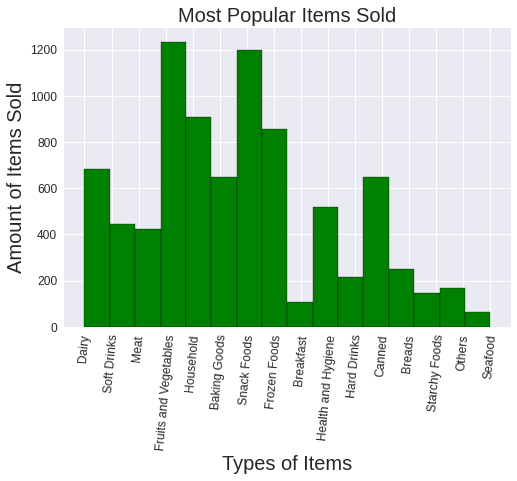

In [125]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
fig, axes = plt.subplots()
df['Item_Type'].hist(edgecolor='black', bins=16, color='green')
plt.xticks(rotation=85, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Types of Items', fontsize=20)
plt.ylabel('Amount of Items Sold', fontsize=20)
plt.title('Most Popular Items Sold', fontsize=20)
plt.show()

Visual interpretation of which items from the stores has the most sales

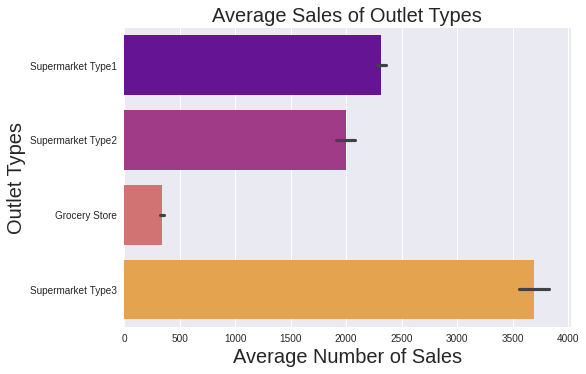

In [132]:
import seaborn as sns
sns.barplot(data=df, x = 'Item_Outlet_Sales', y = 'Outlet_Type', palette='plasma');
plt.xlabel('Average Number of Sales', fontsize=20);
plt.ylabel('Outlet Types', fontsize=20);
plt.title('Average Sales of Outlet Types', fontsize=20);


The visual displays the average sales of outlet types in data set